### Oracles: An oracle is a black box operation used as input to another algorithm. They tend to encode a function                     $\{0, 1\}^n \rightarrow \{0, 1\}^m$ where the goal of the algorithm is to determine some property of f.

#### Types of oracles:
    "LogicalExpression"
    "TruthTable"
    "custom"

In [1]:
# Example 1      Design to give two possible outcomes
from qiskit import QuantumCircuit, Aer, execute, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
import matplotlib.pyplot as plt
from math import pi

def run_oracle(oracle):

    qc = QuantumCircuit(1) 
    qc.h(0)               
    oracle(qc)            
    qc.h(0)               

    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc,backend).result() 
    return qc,result.get_counts()

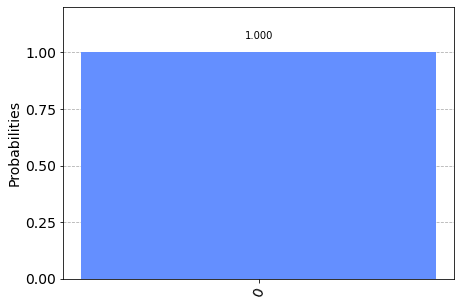

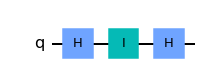

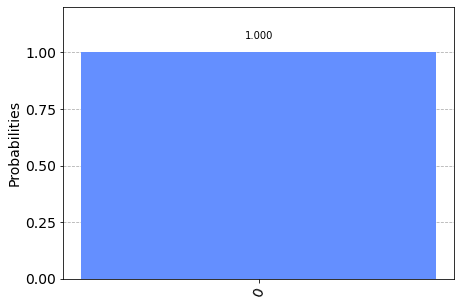

In [3]:
qc,counts = run_oracle(lambda qc: qc.i(0))
qc.draw("mpl")
plot_histogram(counts)

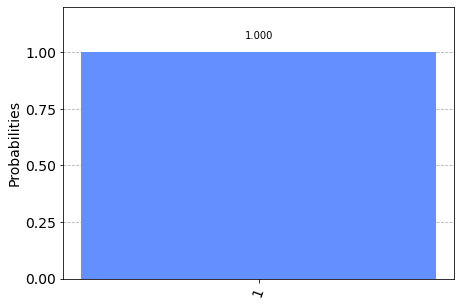

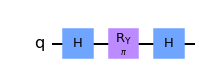

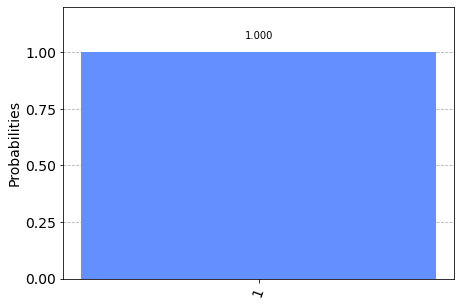

In [2]:
qc,counts = run_oracle(lambda qc: qc.ry(pi,0))
qc.draw("mpl")
plot_histogram(counts)

c:\users\hasan\appdata\local\programs\python\python39\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
c:\users\hasan\appdata\local\programs\python\python39\lib\site-packages\qiskit\aqua\algorithms\amplitude_amplifiers\grover.py:215: DeprecationWarning: The package qiskit.aqua.algorithms.amplitude_amplifiers is deprecated. It was moved/refactored to qiskit.algorithms.amplitude_amplifiers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.algorithms.amplitude_amplifiers',
c:\users\hasan\appdata\local\programs\python\python39\lib\site-packages\qiskit\aqua\quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was 

{'11': 2048}


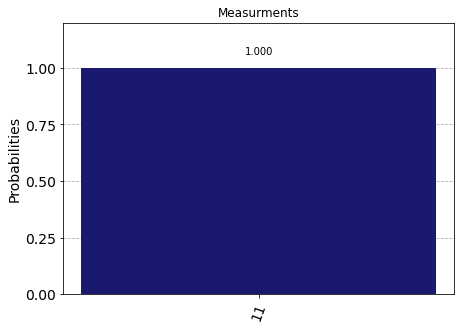

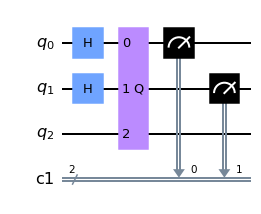

In [3]:
# Example 2 LogicalExpressionOracle (‘AND’==‘&’, 'OR'==‘^’, 'Not'==‘~’)
from qiskit import IBMQ
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle
from qiskit.visualization import plot_histogram

IBMQ.enable_account('d77a7d7f6b178d3fe1e982e75e69452914242cc53de419e04b73bec61760ba2c8e5f639e3a4e7dcc534e55f8abe9c320b2c82d60626cc360d0e0619a8918495e')
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_qasm_simulator')

expression = '(a & b)'                                               
oracle = LogicalExpressionOracle(expression)
grover = Grover(oracle)

result = grover.run(backend, shots=2048)
counts = result['measurement']
plot_histogram(counts, color='midnightblue', title="Measurments",) 
grover.construct_circuit(measurement=True).draw('mpl')    

print(counts)

enter the string 00011000


c:\users\hasan\appdata\local\programs\python\python39\lib\site-packages\qiskit\aqua\algorithms\amplitude_amplifiers\grover.py:215: DeprecationWarning: The package qiskit.aqua.algorithms.amplitude_amplifiers is deprecated. It was moved/refactored to qiskit.algorithms.amplitude_amplifiers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.algorithms.amplitude_amplifiers',
c:\users\hasan\appdata\local\programs\python\python39\lib\site-packages\qiskit\aqua\quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',


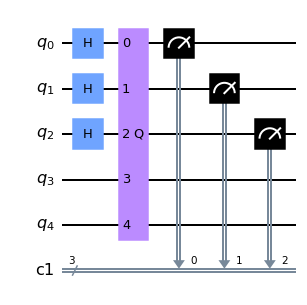

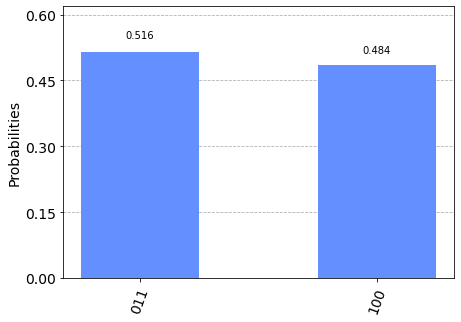

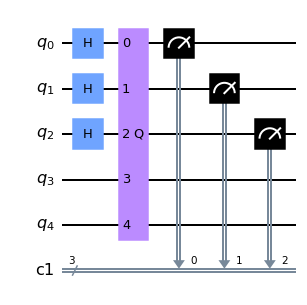

In [5]:
# Example 3 TruthTableOracle
from qiskit import BasicAer
from qiskit.aqua.algorithms import Grover
from qiskit.aqua import QuantumInstance
from qiskit.aqua.components.oracles import TruthTableOracle
from qiskit.tools.visualization import plot_histogram

truthtable= input('enter the string ')
oracle = TruthTableOracle(truthtable)
grover = Grover(oracle)

result = grover.run(QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024))
plot_histogram(result['measurement']) 
grover.construct_circuit(measurement=True).draw('mpl')

In [ ]:
# Example 4 : Coming Soon